#**Prodigy Infotech**

**Abdallah Fekry Mohammed**

ML Internship

Task_1: Housing Price Prediction

Linear Rgression

**Houses Price Prediction**



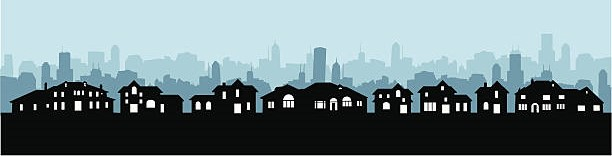

get dataset

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

!kaggle datasets download -d camnugent/california-housing-prices
!unzip  california-housing-prices.zip -d california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  california-housing-prices.zip
replace california-housing-prices/housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: california-housing-prices/housing.csv  


importing needed libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import random as r

In [3]:
ds = pd.read_csv('/content/california-housing-prices/housing.csv')
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
ds.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
ds['ocean_proximity'] = ds['ocean_proximity'].astype('category').cat.codes
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


resolving null values

In [8]:
ds['total_bedrooms'].mean()

537.8705525375618

In [9]:
ds['total_bedrooms'].fillna(ds['total_bedrooms'].mean(), inplace=True)
ds.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

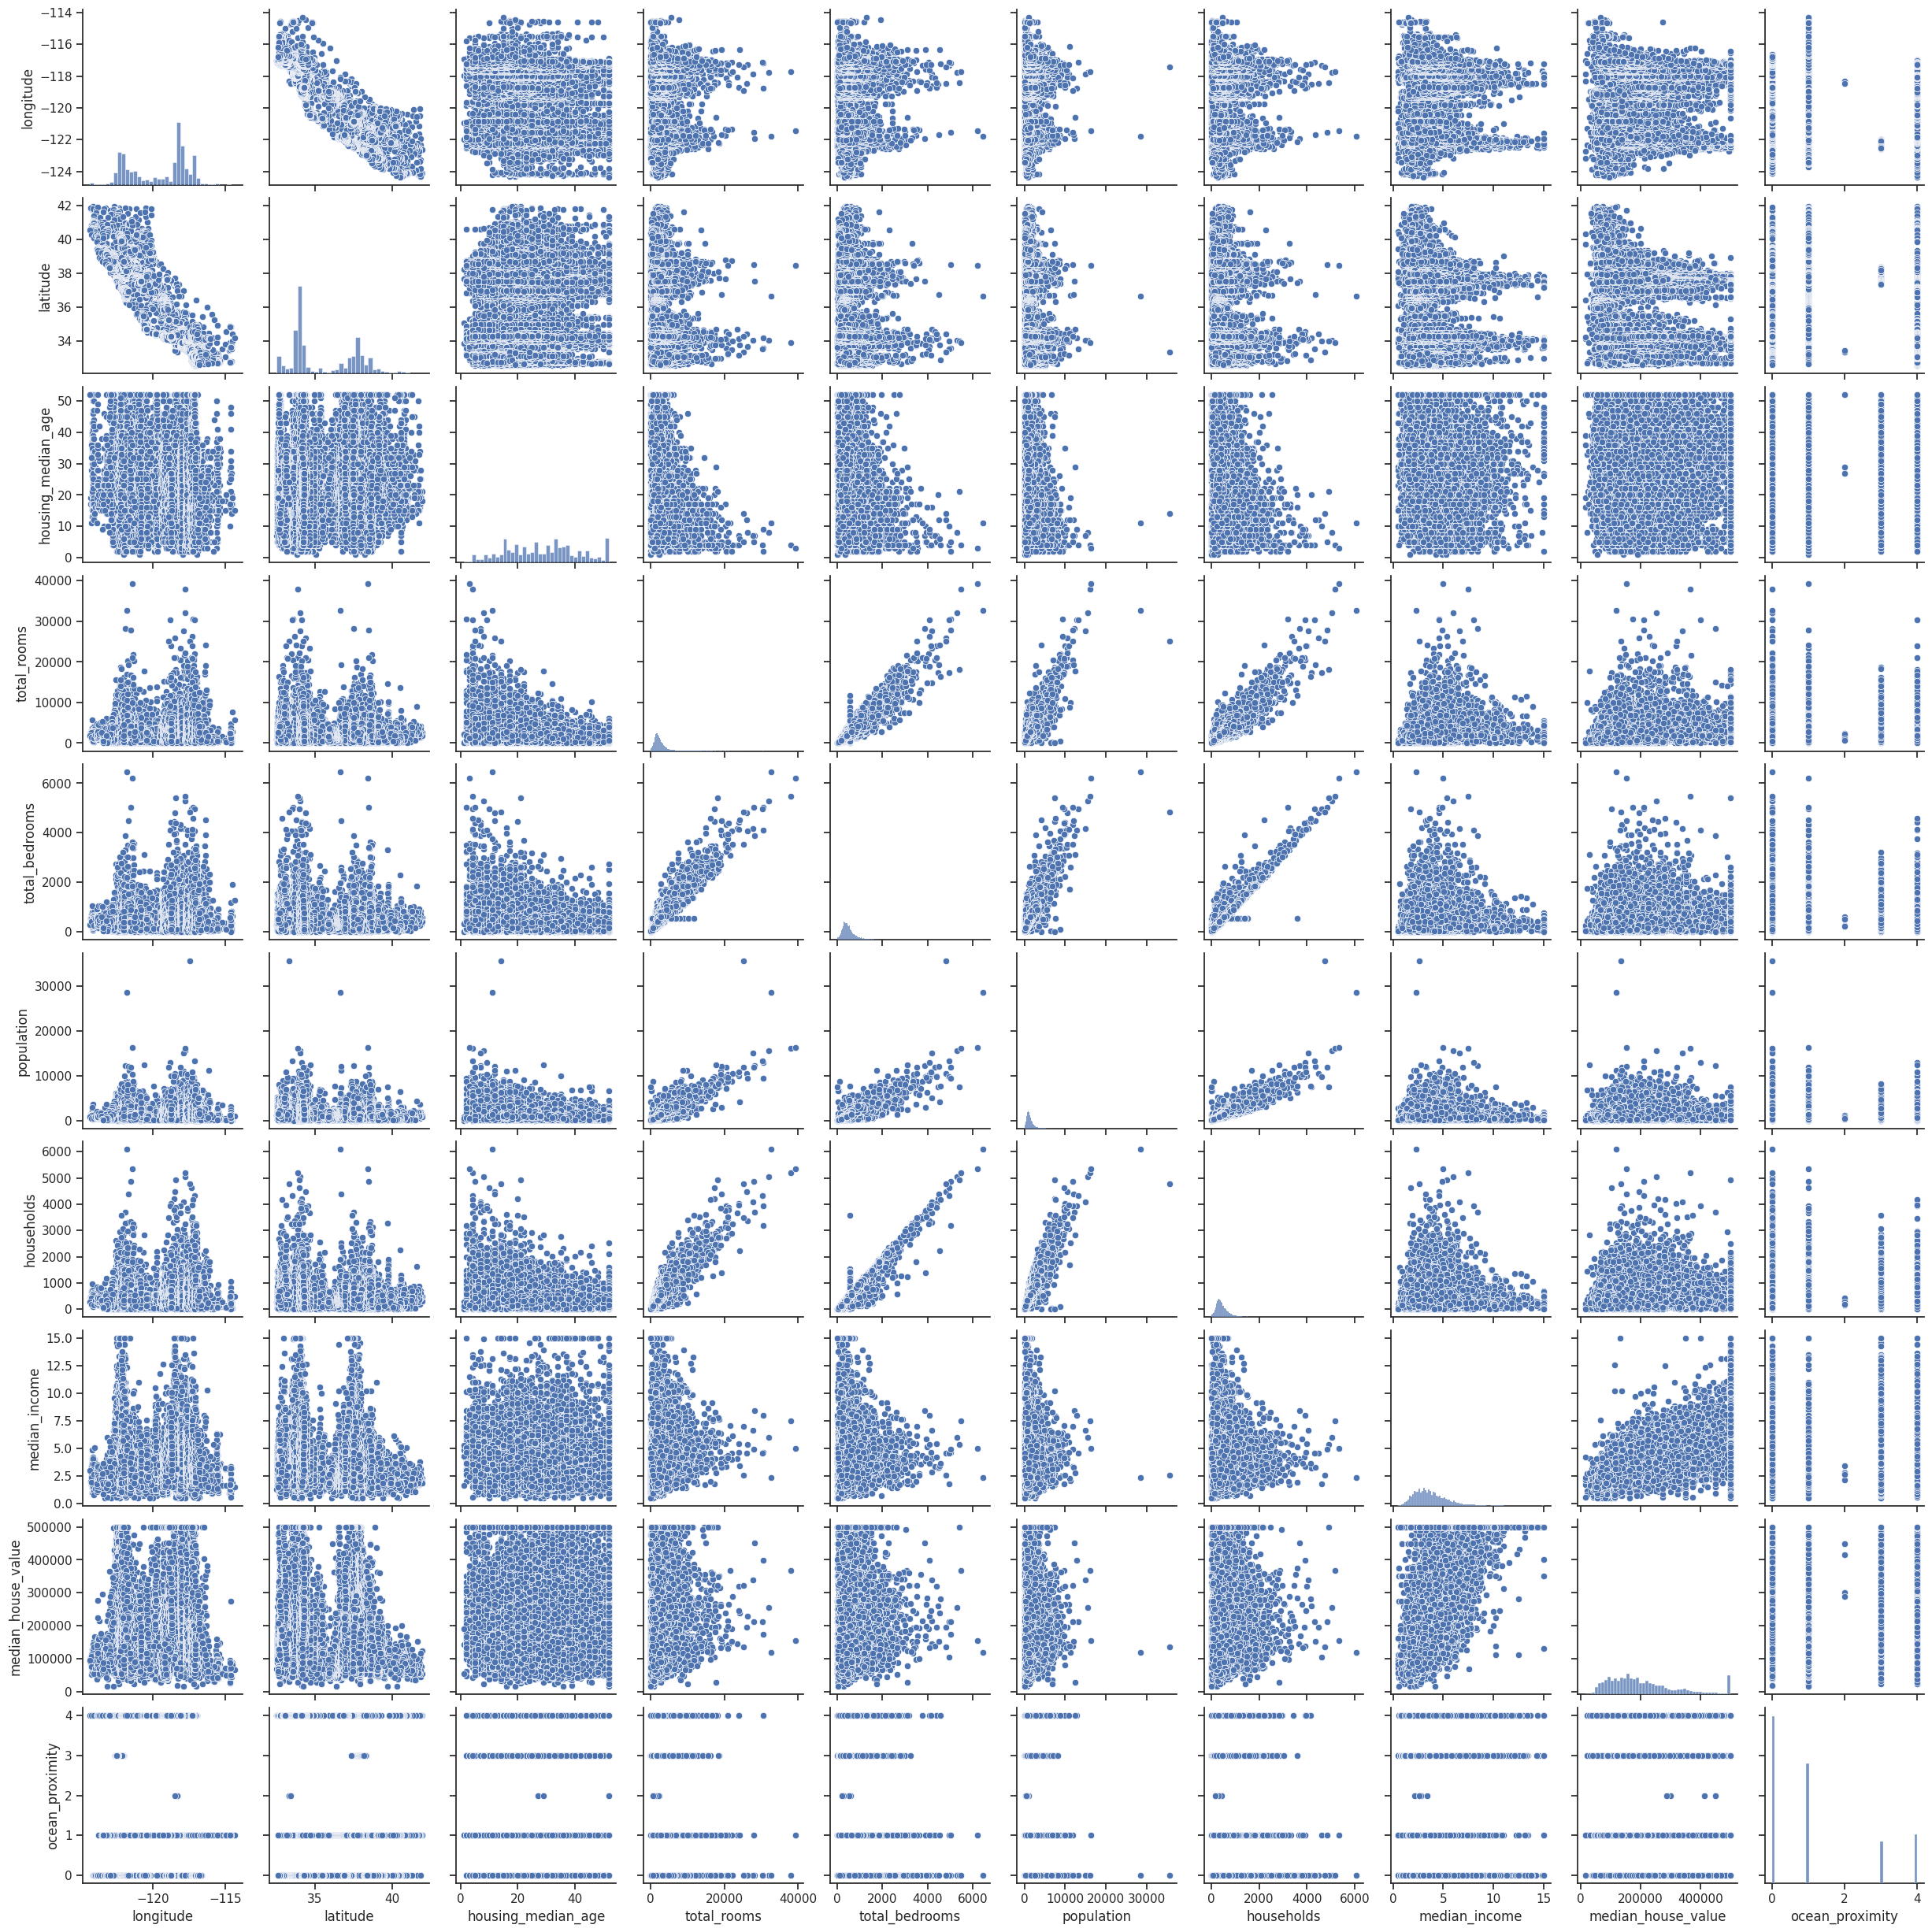

In [10]:
 sns.set(style="ticks")
 sns.pairplot(ds)

Relationships


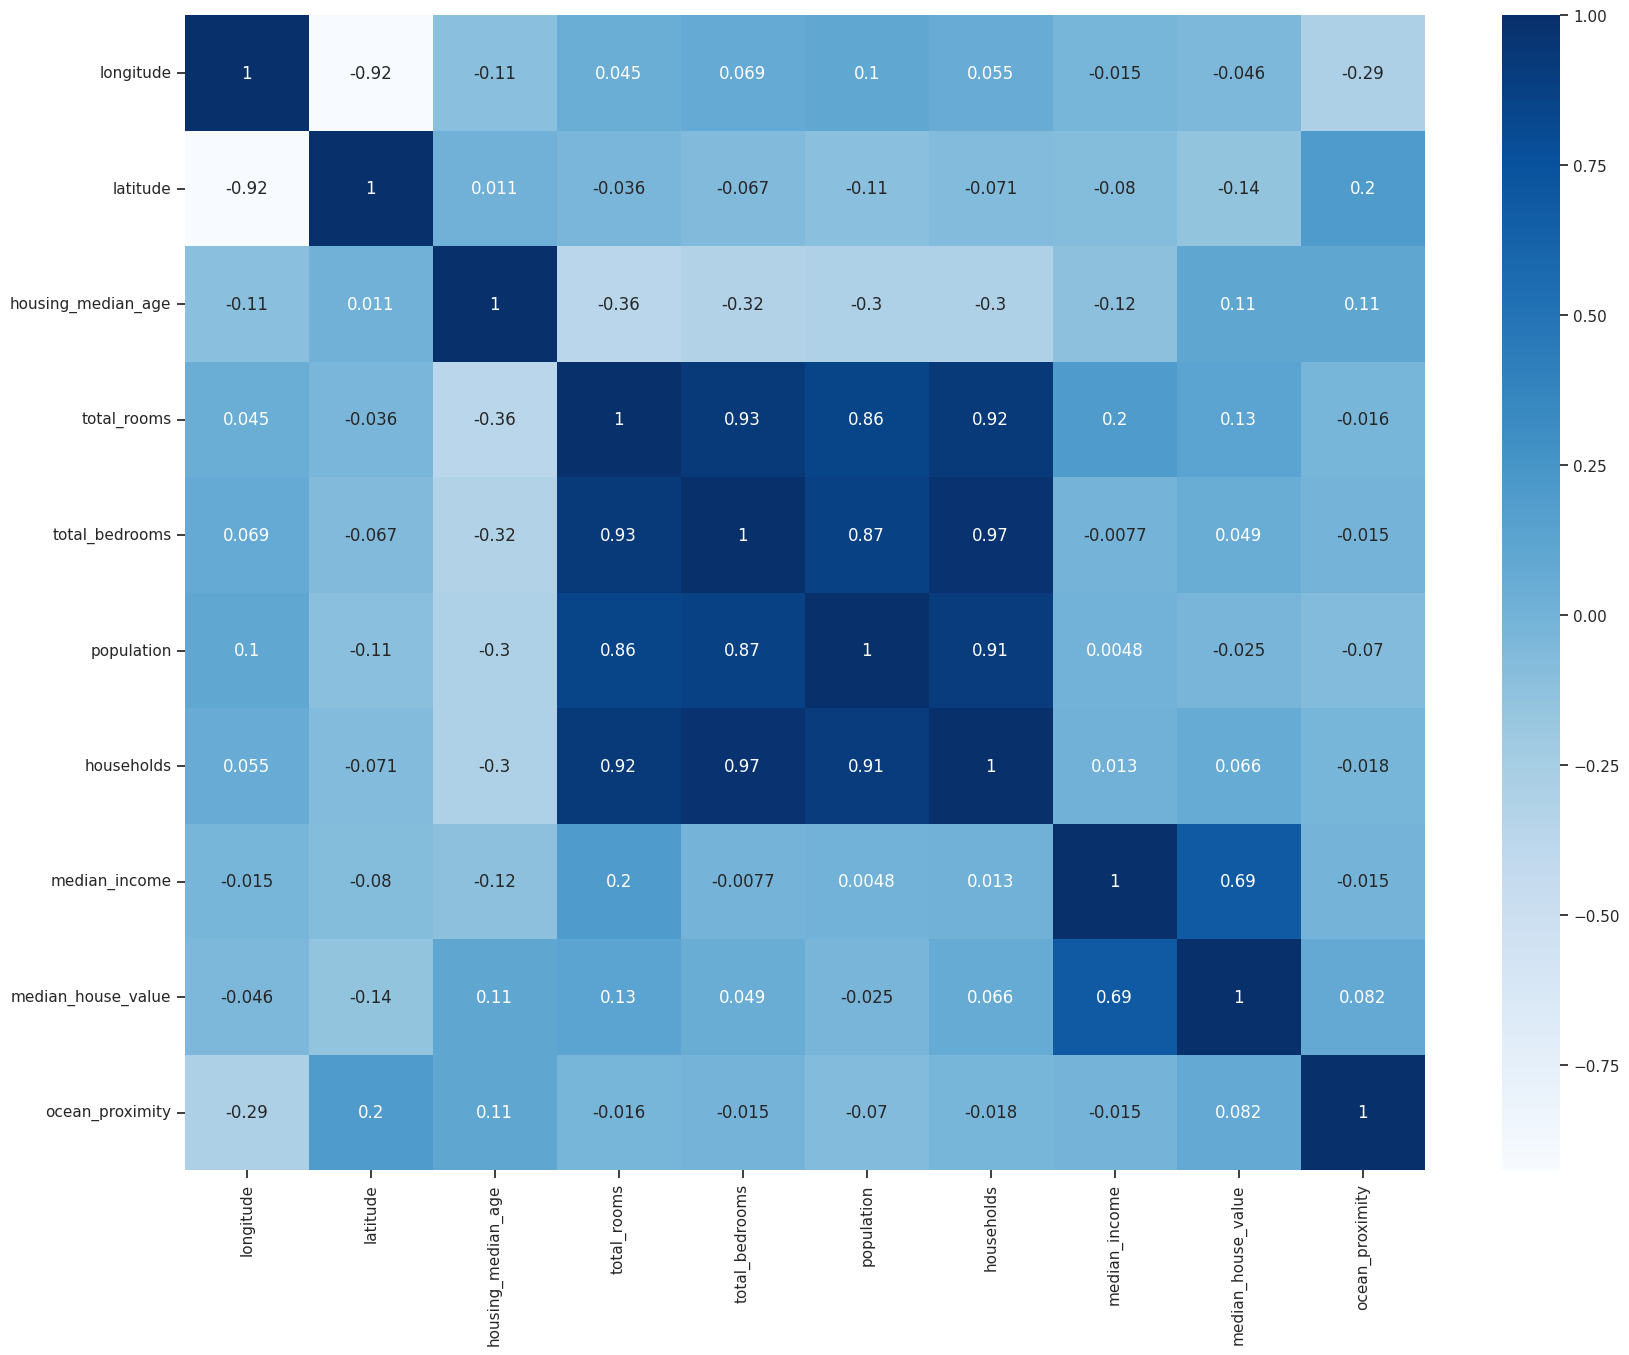

In [11]:
print("Relationships")
plt.figure(figsize=(20, 15))
sns.heatmap(ds.corr(), annot=True, cmap='Blues')
plt.show()

---

In [12]:
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [13]:
x = ds.drop('median_house_value', axis='columns')
y = ds.iloc[:,-2]
print("X shape:",x.shape, "\nY shape:",y.shape)

X shape: (20640, 9) 
Y shape: (20640,)


In [14]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [15]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [16]:
y.shape

(20640,)

In [17]:
scalar = MinMaxScaler()
x = scalar.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=26)
print("X_train shape:",x_train.shape, "\nY_train shape:",y_train.shape,
      "\nX_test shape: ",x_test.shape, "\nY_test shape: ",y_test.shape)

X_train shape: (16512, 9) 
Y_train shape: (16512,) 
X_test shape:  (4128, 9) 
Y_test shape:  (4128,)


In [19]:
x_train[1]

array([0.2440239 , 0.50265675, 0.52941176, 0.11536701, 0.10614525,
       0.05585919, 0.10952146, 0.34213321, 0.        ])

In [20]:
y_train[1]

358500.0

In [21]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
yp = model.predict(x_test)
yp.shape

(4128,)

In [23]:
mse = mean_squared_error(y_test,yp)
mse

4662164532.483506

In [41]:
yp_train = model.predict(x_train)

print("Train score:",r2_score(y_train, yp_train).round(4)*100,"%")
print("Test score:",r2_score(y_test, yp).round(4)*100,"%")

Train score: 63.43 %
Test score: 64.09 %


In [25]:
yp.shape

(4128,)

Random Testing

In [26]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [27]:
x_test[0].shape

(9,)

In [40]:
n = r.randint(0,len(x_test)-1)
yp1 = model.predict(x_test[n].reshape(1,-1))
# yp1 = scalar.inverse_transform(yp1.reshape(-1,1)).reshape(-1)
print("at index '{}' in x_test \nPredicted value = {} \nActual value    = {}".format(n, yp1[0].round(2) ,y_test[n]))

at index '3110' in x_test 
Predicted value = 146016.9 
Actual value    = 144400.0
